In [4]:
import numpy as np
# import pylab as pl
import sys
sys.path.append('/home/hao/Research/pykalman/')
from pykalman import KalmanFilter
from matplotlib import pyplot as pl

In [6]:
rnd = np.random.RandomState(0)
# generate a noisy sine wave to act as our fake observations
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
observations = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))
# create a Kalman Filter by hinting at the size of the state and observation
# space.  If you already have good guesses for the initial parameters, put them
# in here.  The Kalman Filter will try to learn the values of all variables.

/home/hao/anaconda3/envs/dev/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/hao/anaconda3/envs/dev/lib/python3.6/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


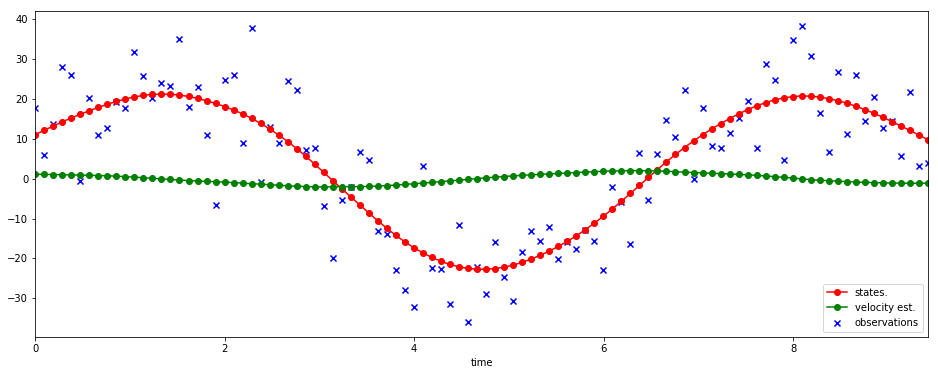

In [10]:
# obs = np.concatenate((x[:, None], observations[:, None]), -1)
obs = observations
# kf = KalmanFilter(n_dim_state=2, n_dim_obs=1)

kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))

states_pred = kf.em(obs).smooth(obs)[0]

pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, obs, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],
                        linestyle='-', marker='o', color='r',
                        label='states.')
velocity_line = pl.plot(x, states_pred[:, 1],
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower right')
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()
# states_pred.shape

In [11]:
kf.observation_matrices

array([[1., 0.]])

In [22]:
Sigma = kf.transition_covariance

In [16]:
A = kf.transition_matrices

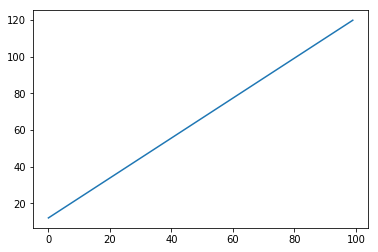

In [25]:
T = 100
X = np.zeros((T, 2))
x = states_pred[0][:, None]
for i in range(T):
    xnew = np.dot(A , x) 
    X[i] = xnew[:, 0]
    x = xnew
pl.plot(X[:,0])